<a href="https://colab.research.google.com/github/adeoluafo/FDSDE_AAfolabi/blob/main/HW7/Kaggle_Customer_Profile_DBscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
pip install kaggle

In [17]:
ls kaggle.json

kaggle.json


first make an account on kaggle and get your kaggle.json file from Account -> Settings. Then put it in a folder on your google drive called `kaggle`


In [18]:
!chmod 600 kaggle.json #only do it once!

In [19]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']


In [20]:
import kaggle


# get info on how to use kaggle datasets to find datasets by name


In [21]:
!kaggle datasets --help

usage: kaggle datasets [-h] {list,files,download,create,version,init,metadata,status} ...

options:
  -h, --help            show this help message and exit

commands:
  {list,files,download,create,version,init,metadata,status}
    list                List available datasets
    files               List dataset files
    download            Download dataset files
    create              Create a new dataset
    version             Create a new dataset version
    init                Initialize metadata file for dataset creation
    metadata            Download metadata about a dataset
    status              Get the creation status for a dataset


# find a file named customer personality analysis

In [22]:
# prompt: find kaggle datasets with name that contains "customer"
# YOUR CODE HERE
!kaggle datasets list -s "customer"

ref                                                      title                                  size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ------------------------------------  -----  -------------------  -------------  ---------  ---------------  
imakash3011/customer-personality-analysis                Customer Personality Analysis          62KB  2021-08-22 18:15:05         159784       2553  0.9705882        
blastchar/telco-customer-churn                           Telco Customer Churn                  172KB  2018-02-23 18:20:00         279304       2841  0.88235295       
datascientistanna/customers-dataset                      Shop Customer Data                     23KB  2023-02-07 18:42:21          39070        534  1.0              
vetrirah/customer                                        Customer Segmentation                 105KB  2020-08-28 11:19:39          18057        162  1.0             

Found the datasets with name that contained customers.

In [54]:
!kaggle datasets download -d imakash3011/customer-personality-analysis  ### YOUR CODE HERE


Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
customer-personality-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [55]:
!kaggle datasets download -d imakash3011/customer-personality-analysis


Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
customer-personality-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


# unpack the file

In [56]:
!ls

customer-personality-analysis.zip  kaggledatasets  kaggle.json	marketing_campaign.csv


In [57]:
!unzip customer-personality-analysis.zip

Archive:  customer-personality-analysis.zip
replace marketing_campaign.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# read in the file

In [27]:
# YOUR CODE HERE
import pandas as pd

df = pd.read_csv('marketing_campaign.csv', sep='\t')

df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


I used sep='\t' because at first when I used just the 'pd.read_csv', the output require me to sepecify a delimeter. It needs to know how to separate the columns within each row of the CSV file, which in this case the delimeter use as a tab, '\t'. The final output consisted of 2240rows and 29rows.

# remove all columns that do not contain numbers (or equivalently select all columns that do)

In [29]:
#YOUR CODE HERE
customer = df.select_dtypes(include='number')
customer

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,0,0,3,11,0


In [30]:
customer.info()#This displays the numerical columns that is remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [31]:
column_length = {c:len(customer[c].unique()) for c in customer.columns}
column_length

{'ID': 2240,
 'Year_Birth': 59,
 'Income': 1975,
 'Kidhome': 3,
 'Teenhome': 3,
 'Recency': 100,
 'MntWines': 776,
 'MntFruits': 158,
 'MntMeatProducts': 558,
 'MntFishProducts': 182,
 'MntSweetProducts': 177,
 'MntGoldProds': 213,
 'NumDealsPurchases': 15,
 'NumWebPurchases': 15,
 'NumCatalogPurchases': 14,
 'NumStorePurchases': 14,
 'NumWebVisitsMonth': 16,
 'AcceptedCmp3': 2,
 'AcceptedCmp4': 2,
 'AcceptedCmp5': 2,
 'AcceptedCmp1': 2,
 'AcceptedCmp2': 2,
 'Complain': 2,
 'Z_CostContact': 1,
 'Z_Revenue': 1,
 'Response': 2}

# remove all columns that have less than 50 unique values (or select all those that have >50)

In [32]:
# Get the unique value counts for each column
column = {c:len(customer[c].unique()) for c in customer.columns}

filtered_columns = [c for c, v in column_length.items() if v > 50]
customer = customer[filtered_columns]
customer

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,5524,1957,58138.0,58,635,88,546,172,88,88
1,2174,1954,46344.0,38,11,1,6,2,1,6
2,4141,1965,71613.0,26,426,49,127,111,21,42
3,6182,1984,26646.0,26,11,4,20,10,3,5
4,5324,1981,58293.0,94,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,46,709,43,182,42,118,247
2236,4001,1946,64014.0,56,406,0,30,0,0,8
2237,7270,1981,56981.0,91,908,48,217,32,12,24
2238,8235,1956,69245.0,8,428,30,214,80,30,61


This table shows all columns that have more than 50 unique values after those with less than 50 have been removed.

# remove the ID which should be a mute index

In [33]:
customer.drop('ID', axis=1, inplace=True)

<ipython-input-33-ef9c307d7022>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer.drop('ID', axis=1, inplace=True)


In [34]:
customer

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1957,58138.0,58,635,88,546,172,88,88
1,1954,46344.0,38,11,1,6,2,1,6
2,1965,71613.0,26,426,49,127,111,21,42
3,1984,26646.0,26,11,4,20,10,3,5
4,1981,58293.0,94,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,46,709,43,182,42,118,247
2236,1946,64014.0,56,406,0,30,0,0,8
2237,1981,56981.0,91,908,48,217,32,12,24
2238,1956,69245.0,8,428,30,214,80,30,61


This is the result after ID was removed

# create a column that contains the age of the customer, instead of the birth year

In [65]:
# YOUR CODE HERE
customer['Age'] = 2024 - customer['Year_Birth']
customer.drop('Year_Birth', axis=1, inplace=True)
customer

<ipython-input-65-527a76f6dc5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer['Age'] = 2024 - customer['Year_Birth']
<ipython-input-65-527a76f6dc5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer.drop('Year_Birth', axis=1, inplace=True)


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,58138.0,58,635,88,546,172,88,88,67
1,46344.0,38,11,1,6,2,1,6,70
2,71613.0,26,426,49,127,111,21,42,59
3,26646.0,26,11,4,20,10,3,5,40
4,58293.0,94,173,43,118,46,27,15,43
...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,57
2236,64014.0,56,406,0,30,0,0,8,78
2237,56981.0,91,908,48,217,32,12,24,43
2238,69245.0,8,428,30,214,80,30,61,68


This new table as an update: The birthyear column has been removed and replace with the actual age.

# scale the data so each feature is mean 0 and standard deviation 1

In [38]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_customers = pd.DataFrame(scaler.fit_transform(customer), columns=customer.columns)
scaled_customers

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,-0.985345,0.234063,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207
1,-1.235733,-0.234559,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006
2,-0.317643,0.769478,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766
3,1.268149,-1.017239,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179
4,1.017761,0.240221,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446
...,...,...,...,...,...,...,...,...,...
2235,-0.150717,0.356642,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,3.891766
2236,-1.903435,0.467539,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,-0.690659
2237,1.017761,0.188091,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,-0.383886
2238,-1.068807,0.675388,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,0.325527


Scaled data so that each feature is mean 0 and standard deviation 1

In [39]:
#check that each column is mean 0 stdev 1
scaled_customers.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2.240000e+03,2.216000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03
mean,-8.133970e-15,4.889791e-17,-3.172066e-18,-7.612958e-17,-2.379049e-17,4.123686e-17,1.506731e-17,-1.506731e-17,-1.110223e-17
std,1.000223e+00,1.000226e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00,1.000223e+00
min,-6.326960e+00,-2.007250e+00,-1.696001e+00,-9.031668e-01,-6.614492e-01,-7.398135e-01,-6.870680e-01,-6.557331e-01,-8.440457e-01
25%,-8.184192e-01,-6.732620e-01,-8.671566e-01,-8.325919e-01,-6.363012e-01,-6.689119e-01,-6.321399e-01,-6.315032e-01,-6.714858e-01
50%,9.967091e-02,-3.439972e-02,-3.777284e-03,-3.875991e-01,-4.602650e-01,-4.429132e-01,-4.673554e-01,-4.618937e-01,-3.838859e-01
75%,6.839101e-01,6.466600e-01,8.596020e-01,5.952483e-01,1.684356e-01,2.882592e-01,2.284015e-01,1.438543e-01,2.296605e-01
max,2.269702e+00,2.441328e+01,1.722981e+00,3.533390e+00,4.343008e+00,6.904261e+00,4.055064e+00,5.716737e+00,6.096698e+00


# PLOT HISTOGRAMS OF ALL VARIABLES

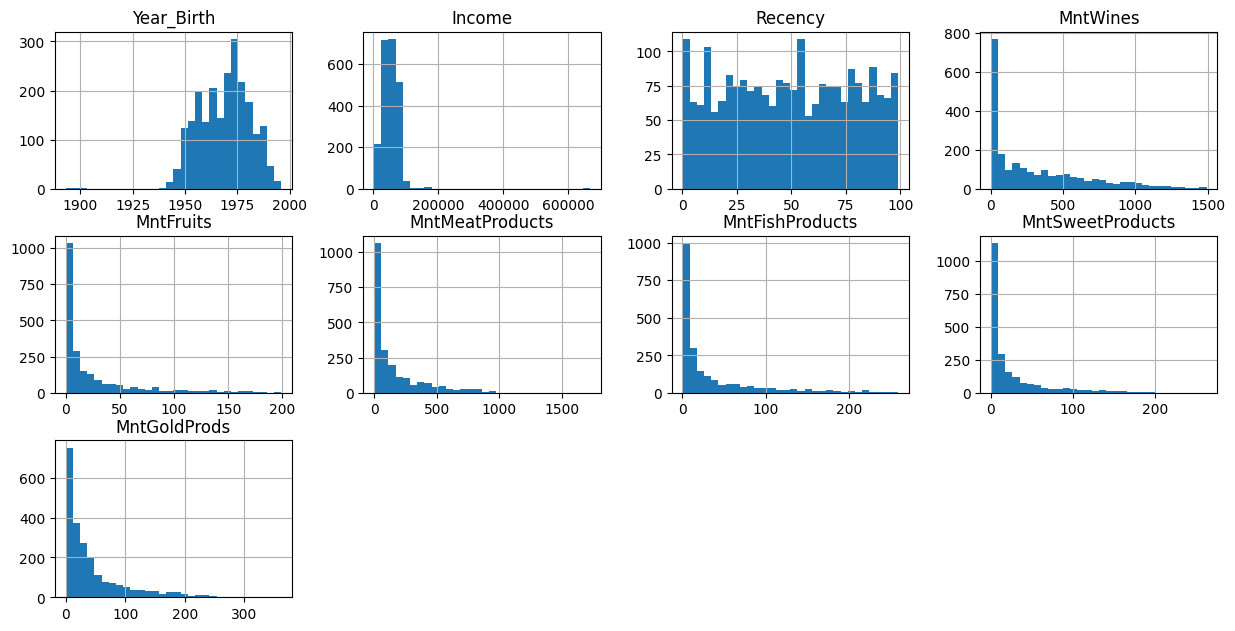

In [40]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

customer.hist(bins=30, figsize=(15, 10), layout=(4, 4))

plt.show()


This shows the Historical representation of each column of the customer table. Most of the columns are skewed to the right. But in the case of the 'Recency', the column is uniformly distributed and also the Age is a normal distribution.

# write a caption for the scatter matrix below

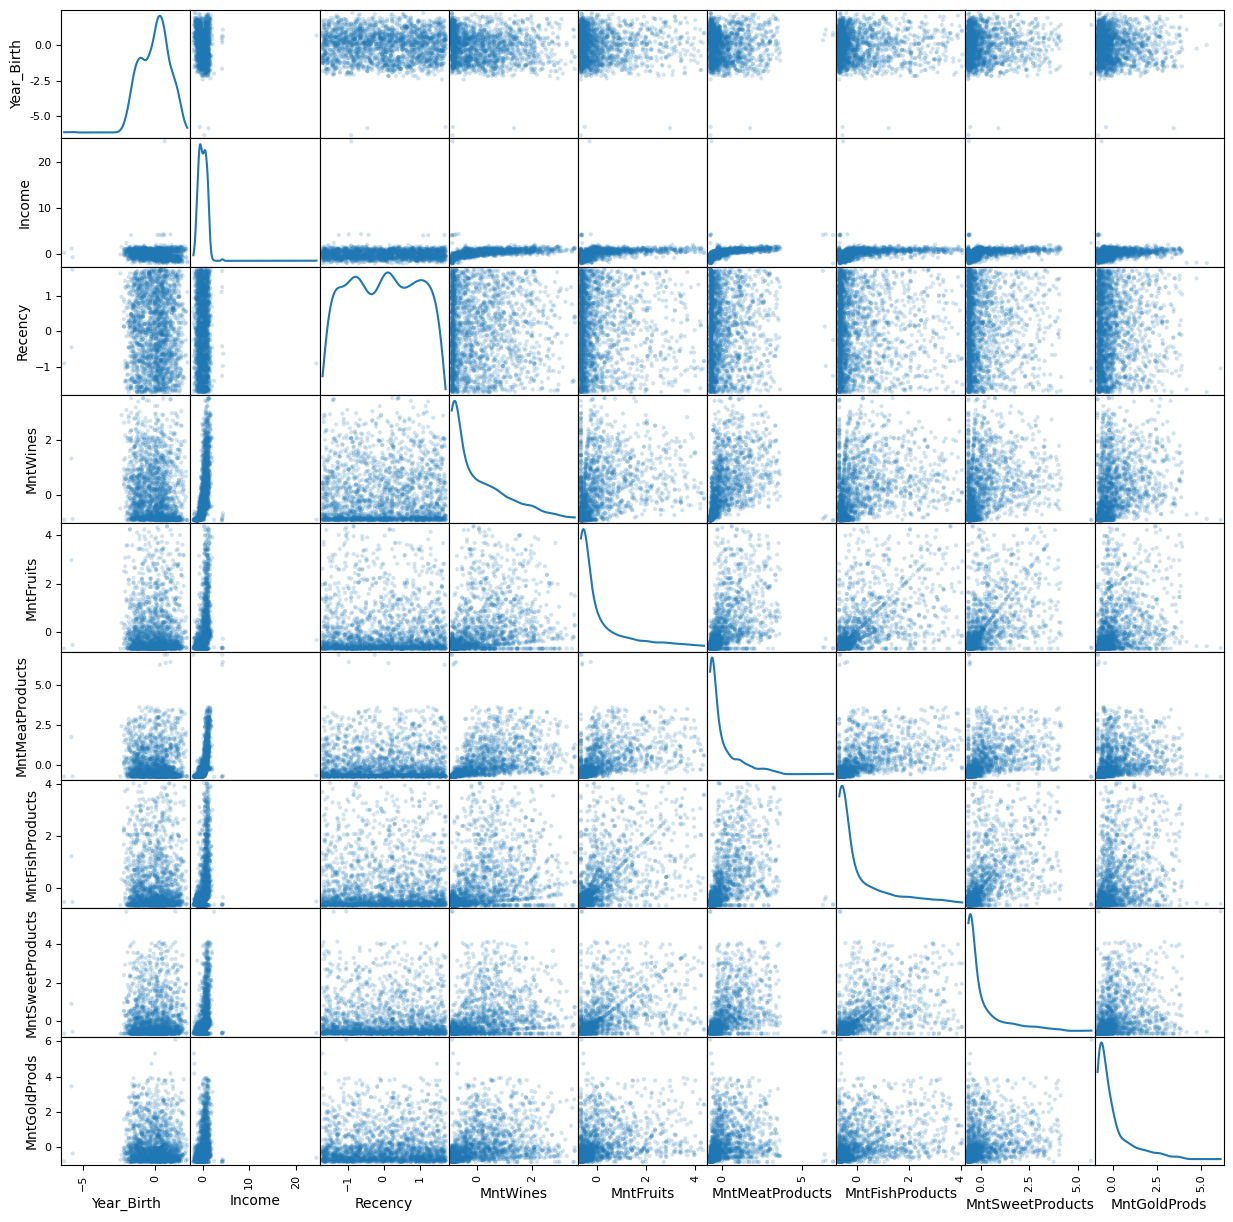

In [41]:
# prompt: plot a scatter matrix of the scaled dataset

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Assuming 'scaled_customers' DataFrame is already created

# Create a scatter matrix plot
scatter_matrix(scaled_customers, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

Scatter matrix plot illustrating relationships between customer attributes such as income, purchase recency, age, and expenditures across various product categories. The diagonal plots display individual variable distributions, offering comprehensive insights into demographic trends and spending behaviors.

# fix NaN by IMPUTING WITH k-NN

In [43]:
# YOUR CODE HERE

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

imputed_data = imputer.fit_transform(scaled_customers)


In [71]:
scaled_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Income            2216 non-null   float64
 1   Recency           2240 non-null   float64
 2   MntWines          2240 non-null   float64
 3   MntFruits         2240 non-null   float64
 4   MntMeatProducts   2240 non-null   float64
 5   MntFishProducts   2240 non-null   float64
 6   MntSweetProducts  2240 non-null   float64
 7   MntGoldProds      2240 non-null   float64
 8   Age               2240 non-null   float64
dtypes: float64(9)
memory usage: 157.6 KB


# CLUSTER THE DATA WITH DB SCAN, THEN SEE HOW MANY CLUSTERS THERE ARE AND HOW MANY OBJECTS IN EACH CLUSTER (your result may differe from mine!)

In [ ]:
# YOUR CODE HERE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import numpy as np

#Using KNNimpute to fill missing values in scaled_customers dataset
scaled_customers = pd.DataFrame(imputer.fit_transform(scaled_customers), columns=scaled_customers.columns)

dbscan = DBSCAN(eps=0.5, min_samples=3)

dbscan.fit(scaled_customers)

# Get the cluster labels
labels = dbscan.labels_

# Add the cluster labels to the original DataFrame
scaled_customers['cluster'] = labels

# Calculating the number of clusters, excluding noise points (label -1)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Counting of objects in each cluster, including noise points
cluster_counts = np.unique(labels, return_counts=True)

print(f"Number of clusters (excluding noise): {num_clusters}")
print("Number of objects in each cluster (including noise if any):")
for cluster_label, count in zip(cluster_counts[0], cluster_counts[1]):
    print(f"Cluster {cluster_label}: {count} objects")


<Figure size 800x600 with 0 Axes>

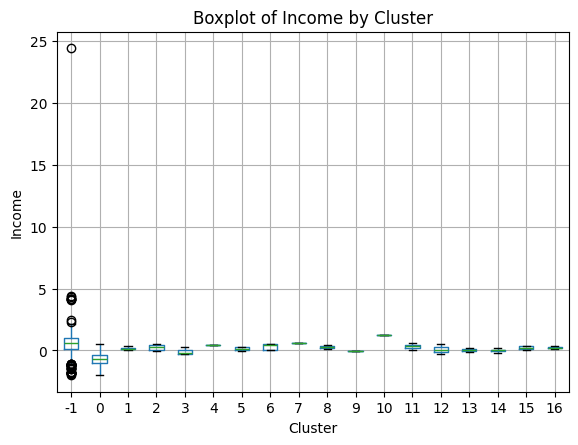

<Figure size 800x600 with 0 Axes>

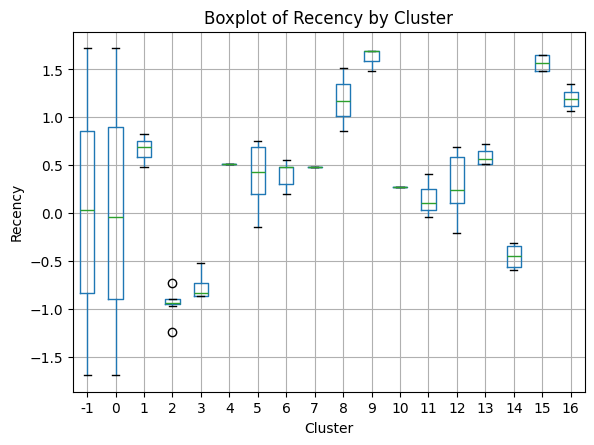

<Figure size 800x600 with 0 Axes>

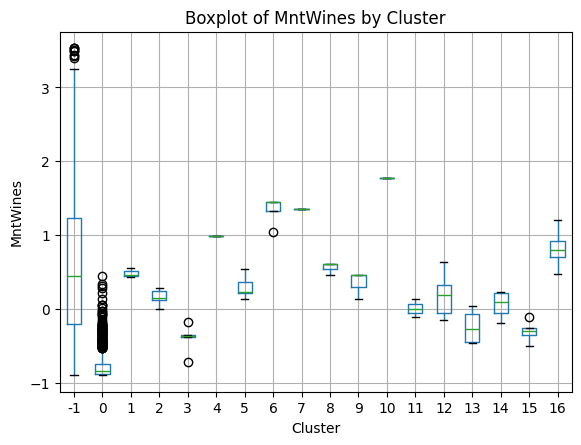

<Figure size 800x600 with 0 Axes>

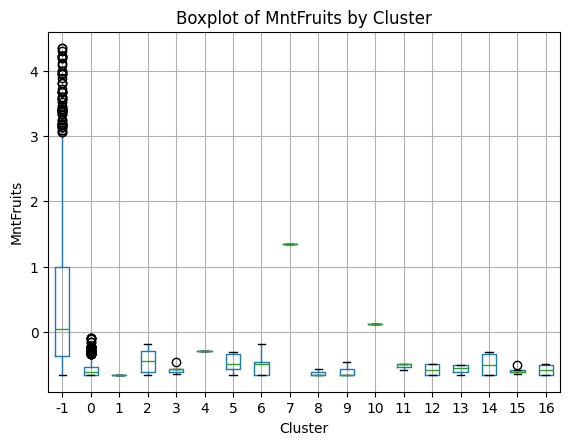

<Figure size 800x600 with 0 Axes>

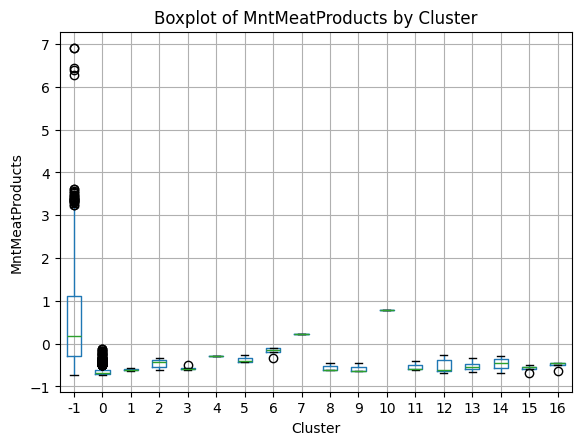

<Figure size 800x600 with 0 Axes>

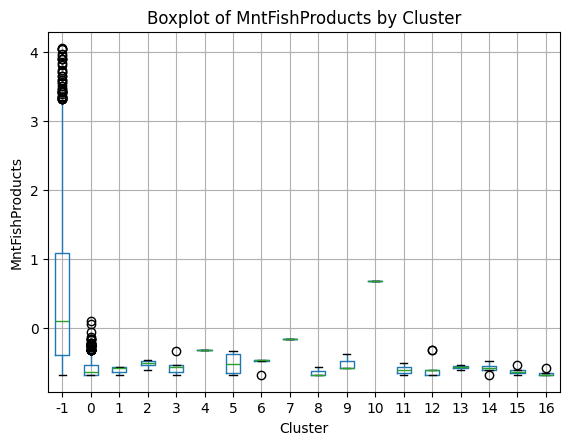

<Figure size 800x600 with 0 Axes>

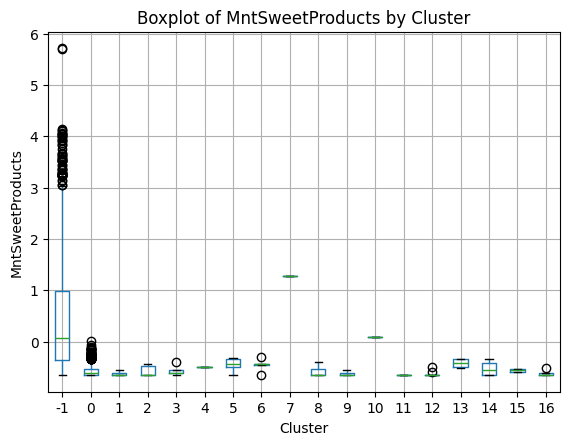

<Figure size 800x600 with 0 Axes>

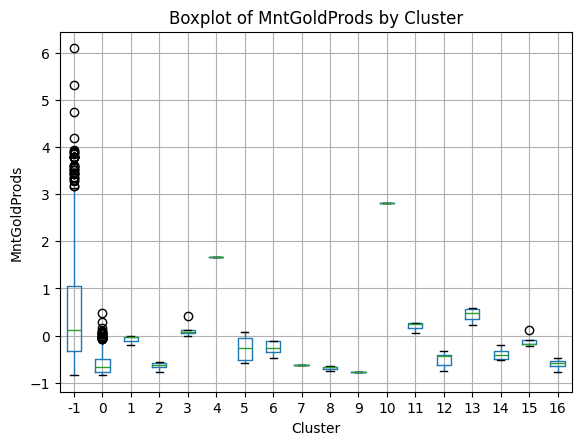

<Figure size 800x600 with 0 Axes>

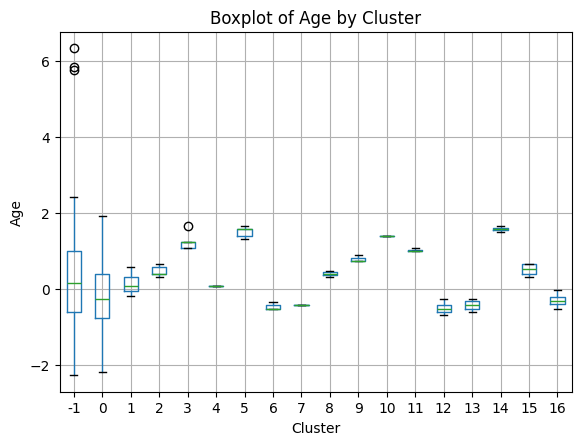

In [73]:
## Keep this code to plot the outcome of the clusteing
import matplotlib.pyplot as plt

# Assuming 'scaled_customers' DataFrame and 'clusters' are already created

# Create a box and whiskers plot for each cluster
for column in scaled_customers.columns:
  if column != 'cluster':  # Exclude the cluster column itself
    plt.figure(figsize=(8, 6))
    scaled_customers.boxplot(column=column, by='cluster')
    plt.title(f'Boxplot of {column} by Cluster')
    plt.suptitle('')  # Remove the default suptitle
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

This analysis showcases customer clusters identified using DBSCAN, highlighting the number of clusters and the distribution of data points within each. Boxplots are utilized to illustrate the variation of each feature across the different clusters, providing deeper insights into cluster characteristics

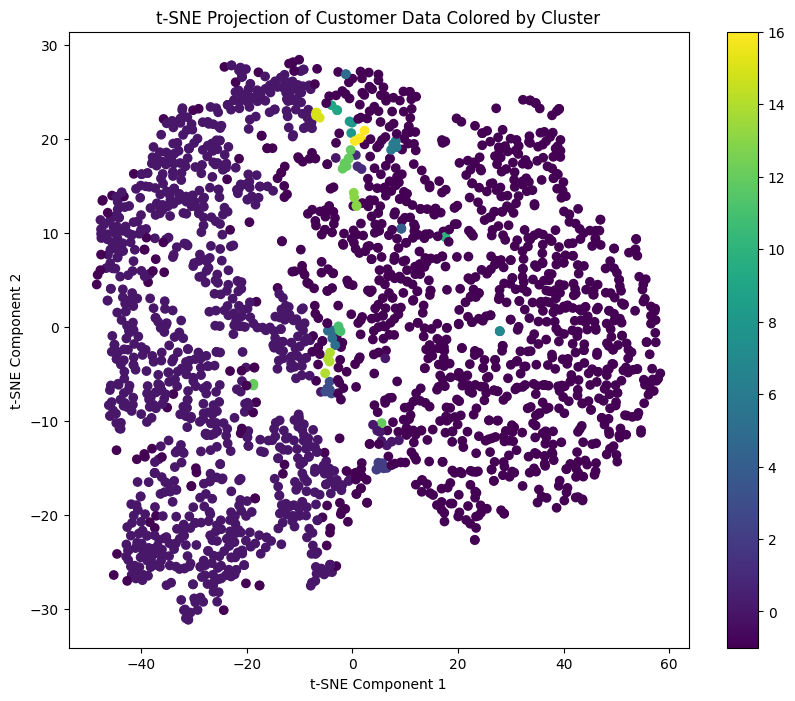

In [74]:
# prompt: produce a tsne 2d projection of scaled_data and plot it colored by cluster

from sklearn.manifold import TSNE

# Assuming 'scaled_customers' DataFrame with 'cluster' column is already created

# Create a t-SNE object
tsne = TSNE(n_components=2, random_state=42, early_exaggeration=15, perplexity=50)

# Fit and transform the scaled data to reduce it to 2 dimensions
tsne_results = tsne.fit_transform(scaled_customers.drop('cluster', axis=1))

# Add the t-SNE results to the DataFrame
scaled_customers['tsne_x'] = tsne_results[:, 0]
scaled_customers['tsne_y'] = tsne_results[:, 1]

# Plot the t-SNE projection, colored by cluster
plt.figure(figsize=(10, 8))
plt.scatter(scaled_customers['tsne_x'], scaled_customers['tsne_y'], c=scaled_customers['cluster'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Projection of Customer Data Colored by Cluster')
plt.colorbar()
plt.show()

This 2D visualization depicts distinct customer segments identified through DBSCAN clustering, based on shared behaviors and demographic traits. Each color represents a unique cluster, highlighting potential customer segments, while dense areas indicate core groups. In conclusion, The t-SNE projection of scaled customer data enhances the visualization, effectively showcasing the structure and relationships within the data and offering insights into customer segmentation and clustering pattern.
